Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset.

In [3]:
df = pd.read_csv('doge_data.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...,...
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0
1759,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN


Let us check the relationship between these features using correlation.

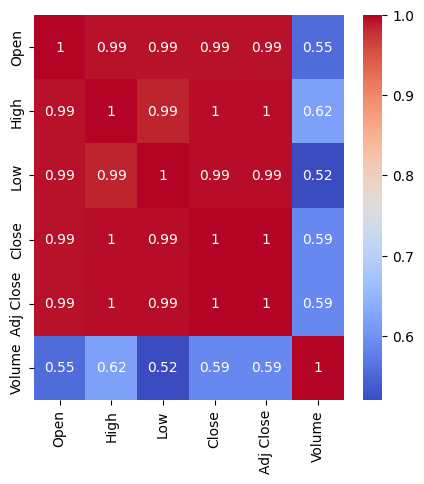

In [5]:
numeric_df = df.select_dtypes(include='number')
corrmat = numeric_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')
plt.show()

Now we have to convert the date column into date time data type.

In [6]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.set_index('Date', inplace=True)
df.isnull().sum()

C:\Users\arkha\AppData\Local\Temp\ipykernel_6484\2039751249.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Let us drop this null value.

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Let us check the statistical measures of this dataset.

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Let us draw a few plots to see possible trends.

Text(0.5, 1.0, 'Date against Close of 2021')

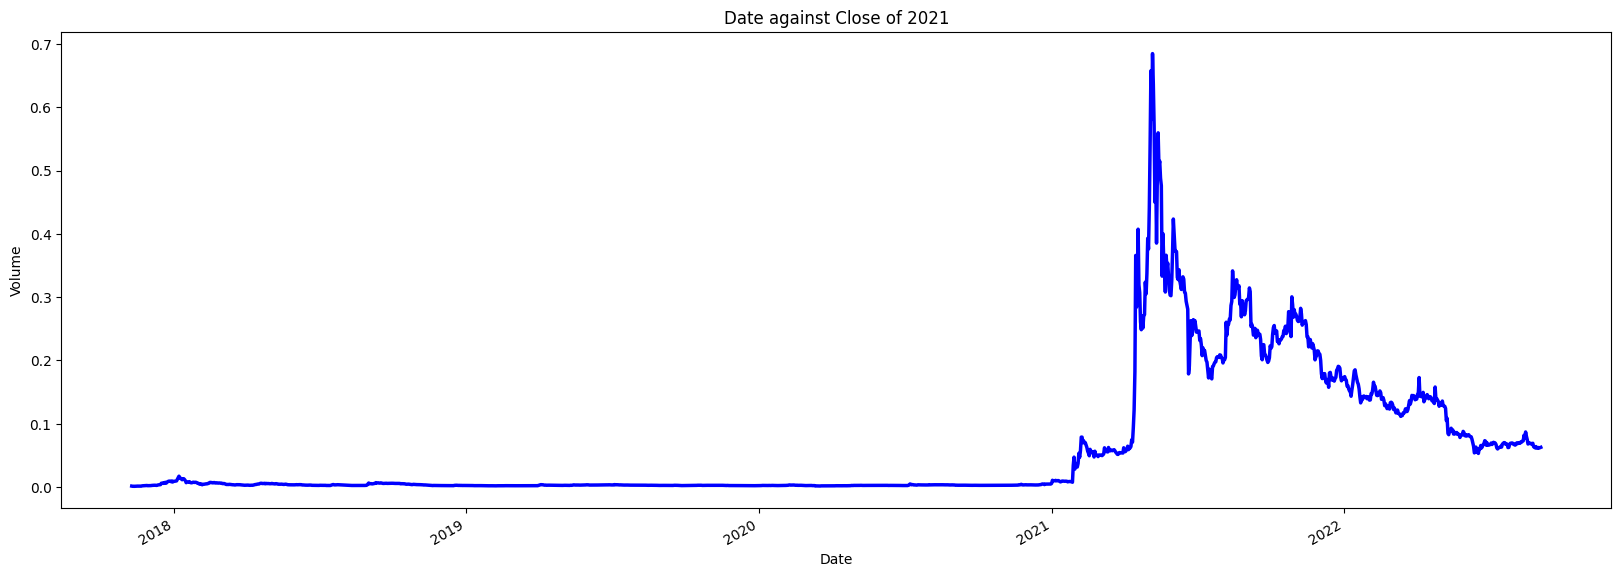

In [10]:
plt.figure(figsize=(20,7))
x = df.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date against Close of 2021')

We use different factors and name them suitably based on our predicted feature (Close). It is sorted in descending order while considering the correlation.

In [11]:
 
df["gap"] = (df["High"] - df["Low"]) * df["Volume"] 
df["y"] = df["High"] / df["Volume"] 
df["z"] = df["Low"] / df["Volume"] 
df["a"] = df["High"] / df["Low"] 
df["b"] = (df["High"] / df["Low"]) * df["Volume"] 
abs(df.corr()["Close"].sort_values(ascending=False)) 

C:\Users\arkha\AppData\Local\Temp\ipykernel_6484\781192625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gap"] = (df["High"] - df["Low"]) * df["Volume"]
C:\Users\arkha\AppData\Local\Temp\ipykernel_6484\781192625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"] = df["High"] / df["Volume"]
C:\Users\arkha\AppData\Local\Temp\ipykernel_6484\781192625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
gap          0.383333
a            0.172057
z            0.063251
y            0.063868
Name: Close, dtype: float64

High, low and open can  be ignored as they have a high correlation.

In [12]:
 
df = df[["Close", "Volume", "gap", "a", "b"]] 
df.head() 

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


Splitting the data into training and testing components.

In [13]:
df = df.tail(30) 
train = df[:11] 
test = df[-19:] 

Developing the SARIMA time series model

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
model = SARIMAX(endog=train["Close"], exog=train.drop( 
    "Close", axis=1), order=(2, 1, 1)) 
results = model.fit() 
print(results.summary()) 

c:\Users\arkha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\arkha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\arkha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\arkha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  47.663
Date:                Wed, 13 Mar 2024   AIC                            -79.326
Time:                        18:29:54   BIC                            -76.905
Sample:                    08-05-2022   HQIC                           -81.981
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      7.491e-10   1.84e-10      4.077      0.000    3.89e-10    1.11e-09
gap          1.13e-08   2.45e-09      4.615      0.000     6.5e-09    1.61e-08
a             -0.0073   5.05e-15  -1.44e+12      0.0

The predictions can now be printed in a seqeuntial series order.

In [15]:
start = 11
end = 29
predictions = results.predict( 
    start=start, 
    end=end, 
    exog=test.drop("Close", axis=1)) 
predictions 

2022-08-16    0.097293
2022-08-17    0.083717
2022-08-18    0.075957
2022-08-19    0.069575
2022-08-20    0.071583
2022-08-21    0.072099
2022-08-22    0.071244
2022-08-23    0.072458
2022-08-24    0.072406
2022-08-25    0.071893
2022-08-26    0.068140
2022-08-27    0.071804
2022-08-28    0.071866
2022-08-29    0.071522
2022-08-30    0.070720
2022-08-31    0.071736
2022-09-01    0.071452
2022-09-02    0.072203
2022-09-03    0.072785
Freq: D, Name: predicted_mean, dtype: float64

A plot can be created for the predictions.

<Axes: xlabel='Date'>

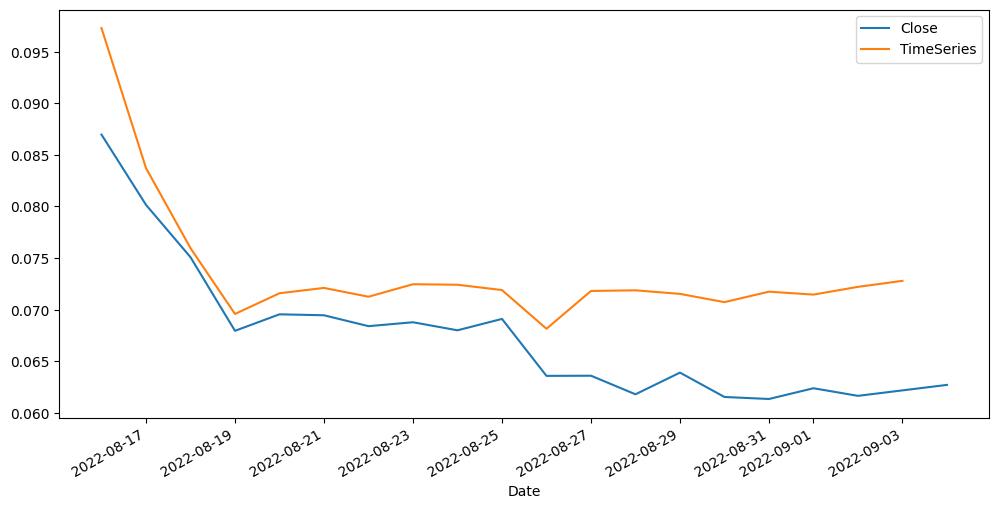

In [16]:
test["Close"].plot(legend=True, figsize=(12, 6)) 
predictions.plot(label='TimeSeries', legend=True) 